In [2]:
import numpy as np
import math
import scipy as sp
import scipy.stats as st
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.sandbox.stats.multicomp as multi
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error


In [4]:
df = pd.read_csv('data_and_materials/CO2.csv',sep=',',skiprows=57,header=None)

In [4]:
###TAB1

#In 1958, Charles David Keeling (1928-2005) from the Scripps Institution of Oceanography began recording 
#carbon dioxide (CO2) concentrations in the atmosphere at an observatory located at about 3,400 m altitude 
#on the Mauna Loa Volcano on Hawaii Island. The location was chosen because it is not influenced by changing 
#CO2 levels due to the local vegetation and because prevailing wind patterns on this tropical island tend to 
#bring well-mixed air to the site. While the recordings are made near a volcano (which tends to produce CO2), 
#wind patterns tend to blow the volcanic CO2 away from the recording site. Air samples are taken several times 
#a day, and concentrations have been observed using the same measuring method for over 60 years. In addition, 
#samples are stored in flasks and periodically reanalyzed for calibration purposes. The observational study 
#is now run by Ralph Keeling, Charles's son. The result is a data set with very few interruptions and very 
#few inhomogeneities. It has been called the “most important data set in modern climate research."

##The data set for this problem can be found in CO2.csv. It provides the concentration of CO2 recorded at 
#Mauna Loa for each month starting March 1958. More description is provided in the data set file. We will be 
#considering only the CO2 concentration given in column 5. The goal of the problem is to fit the data and understand 
#its variations. You will encounter missing data points; part of the exercise is to deal with them appropriately.

#Let Ci be the average CO2 concentration in month i (i=1,2,⋯, counting from March 1958). We will look for a description of the form:

#Ci=F(ti)+Pi+Ri

#where:

#F:t↦F(t) accounts for the long-term trend.

#ti is time at the middle of the ith month, measured in fractions of years after Jan 15, 1958. Specifically, we take

#ti=i+0.512,i=0,1,…,
 
#where i=0 corresponds to Jan, 1958, adding 0.5 is because the first measurement is halfway through the first month.

#Pi is periodic in i with a fixed period, accounting for the seasonal pattern.

#Ri is the remaining residual that accounts for all other influences.

#The decomposition is meaningful only if the range of F is much larger than the amplitude of the Pi and this amplitude 
#in turn is substantially larger than that of Ri. You are required to split the data into training and test datasets - 
#you can perform an 80:20 split. All model fitting should be done only on the training set and all the remaining data 
#should be used for evaluation (for the purpose of model selection), i.e. prediction errors should be reported with 
#respect to the test set. 

#At the end of this problem you should be able to 
# Handle incomplete data sets using at least using one method. 
#Perform time series regression and find the deterministic and periodic trends in data.
#Interpret residuals.

###Pre-Processing data

#You may notice that there are some inhomogeneities in data and the CO2 concentration at these points is recorded as -99.99. 
#Before proceeding, we must clean the data. One simple way to do this is to drop all missing values from the table. 
#For the purpose of the problems below, use this simple method of dropping all the missing values.

#Other methods include forward filling–fill missing values with previous values, and interpolation.

#The pre-processing should be done before splitting data.






In [5]:
df.columns=('yr','mn','datem','date','co2','season','fit','seasonf','co2_2','season_2')
t = np.array((df.index+0.5)/12) #time index as expected by the questions

In [6]:
df

,yr,mn,datem,date,co2,season,fit,seasonf,co2_2,season_2
0,1958,1,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
1,1958,2,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71
...,...,...,...,...,...,...,...,...,...,...
739,2019,8,43692,2019.6219,410.08,411.62,410.17,411.75,410.08,411.62
740,2019,9,43723,2019.7068,408.55,412.06,-99.99,-99.99,408.55,412.06
741,2019,10,43753,2019.7890,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
742,2019,11,43784,2019.8740,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99


In [157]:
#df2 = df.drop(index=[0,1])
#df2.columns = df2.columns.str.strip()

df2 = df[df['co2']!=-99.99] #remove all values with missing CO2
t2 = t[df['co2']!=-99.99]

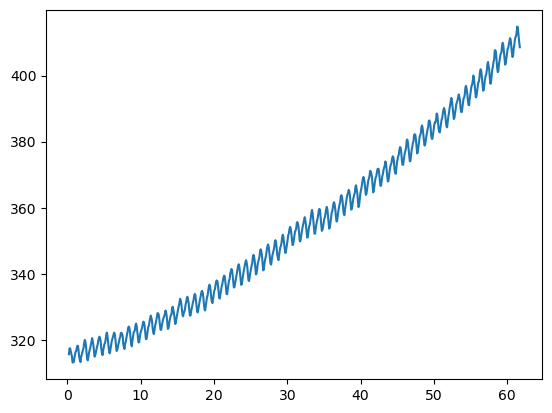

In [5]:
plt.plot(t2,df2['co2'])

In [6]:
x = np.array(t2.reshape(-1,1))
y = np.array(df2['co2']).reshape(-1,1)

#reg = LinearRegression().fit(t2,Y)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,shuffle=False)

In [8]:
regr = LinearRegression().fit(x_train,y_train)
147/587

0.2504258943781942

In [9]:
regr.score(x_test,y_test),regr.score(x_train,y_train)

(-0.49163105930540274, 0.9764754552037069)

In [10]:
ypred = regr.predict(x)
ypred_test = regr.predict(x_test)


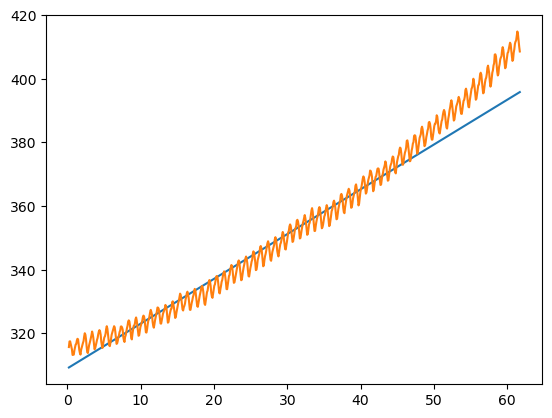

In [172]:
plt.plot(x,ypred,t2,df2['co2']) #plot of the fit + data

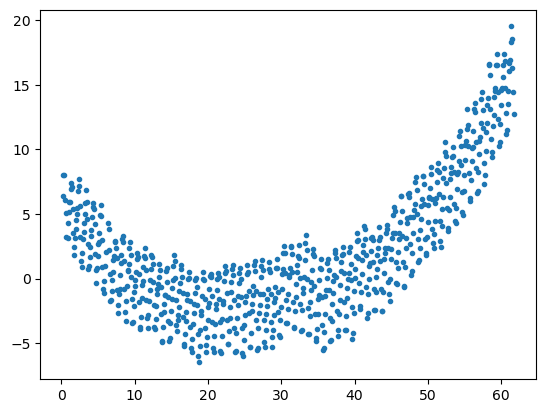

In [11]:
resid = y-ypred
plt.plot(t2,resid,'.') #plot of the residuals

In [12]:
print('Slope:',regr.coef_[0][0]) #slope
print('Intercept',regr.intercept_[0])

Slope: 1.4066911494215177
Intercept 308.9916567323666


In [13]:
print('RMSE:',mean_squared_error(y_test,ypred_test,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test,ypred_test)*100)


RMSE: 10.64145852187467
MAPE: 2.450454956443142


MAPE: 2.450454956443142


In [14]:
###fitting a quadratic model
x2 = t2**2

In [15]:
x2 = np.column_stack((t2,t2**2))

In [16]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y,test_size=0.20,shuffle=False)

In [17]:
regr2 = LinearRegression().fit(x_train2,y_train2)

In [18]:
regr2.score(x_test2,y_test2),regr2.score(x_train2,y_train2)

(0.9175858356919127, 0.9882301911588206)

In [19]:
ypred2 = regr2.predict(x2)

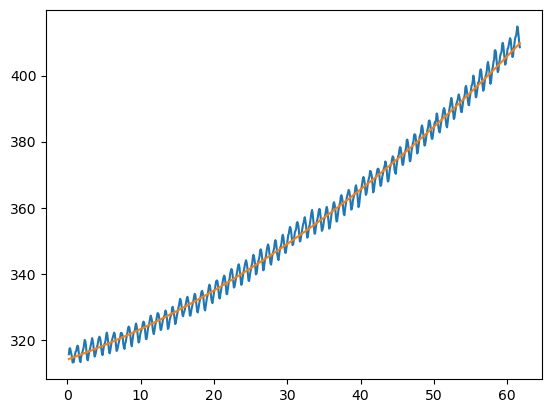

In [20]:
plt.plot(t2,y,t2,ypred2)

In [21]:
print('Coefs:',regr2.coef_[0]) #slope
print('Intercept',regr2.intercept_[0])


Coefs: [0.80209702 0.0121175 ]
Intercept 314.1005841870842


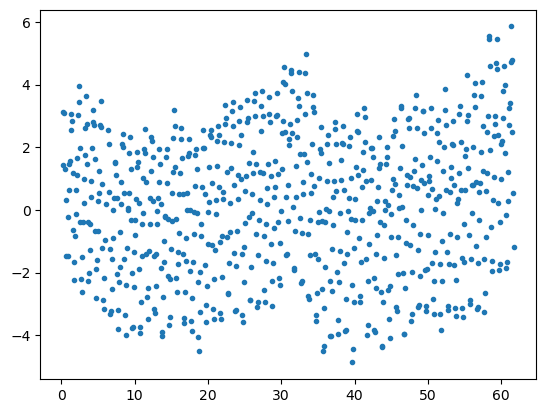

In [22]:
#residuals
plt.plot(t2,y-ypred2,'.')

In [23]:
ypred_test2 = regr2.predict(x_test2)
print('RMSE:',mean_squared_error(y_test2,ypred_test2,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test2,ypred_test2)*100)


RMSE: 2.5013322194897802
MAPE: 0.5320319129740849


In [239]:
x_test2

array([[  49.54166667, 2454.37673611],
       [  49.625     , 2462.640625  ],
       [  49.70833333, 2470.91840278],
       [  49.79166667, 2479.21006944],
       [  49.875     , 2487.515625  ],
       [  49.95833333, 2495.83506944],
       [  50.04166667, 2504.16840278],
       [  50.125     , 2512.515625  ],
       [  50.20833333, 2520.87673611],
       [  50.29166667, 2529.25173611],
       [  50.375     , 2537.640625  ],
       [  50.45833333, 2546.04340278],
       [  50.54166667, 2554.46006944],
       [  50.625     , 2562.890625  ],
       [  50.70833333, 2571.33506944],
       [  50.79166667, 2579.79340278],
       [  50.875     , 2588.265625  ],
       [  50.95833333, 2596.75173611],
       [  51.04166667, 2605.25173611],
       [  51.125     , 2613.765625  ],
       [  51.20833333, 2622.29340278],
       [  51.29166667, 2630.83506944],
       [  51.375     , 2639.390625  ],
       [  51.45833333, 2647.96006944],
       [  51.54166667, 2656.54340278],
       [  51.625     , 26

In [25]:
###Fitting a cubic model
x3 = np.column_stack((t2,t2**2,t2**3))


In [26]:
x_train3,x_test3,y_train3,y_test3 = train_test_split(x3,y,test_size=0.20,shuffle=False)

In [27]:
regr3 = LinearRegression().fit(x_train3,y_train3)

In [28]:
regr3.score(x_test3,y_test3),regr3.score(x_train3,y_train3)

(0.7732101681255958, 0.9884054161458382)

In [29]:
ypred3 = regr3.predict(x3)

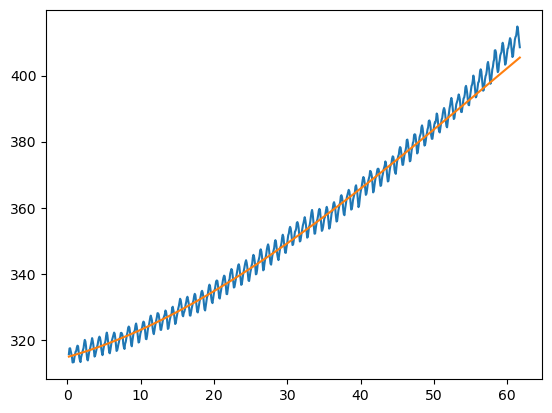

In [30]:
plt.plot(t2,y,t2,ypred3)

In [31]:
print('Coefs:',regr3.coef_[0]) #slope
print('Intercept',regr3.intercept_[0])


Coefs: [ 6.24895409e-01  2.09575674e-02 -1.18323397e-04]
Intercept 314.85852615628914


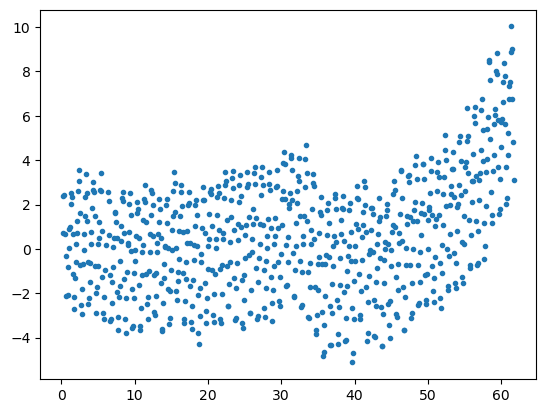

In [32]:
plt.plot(t2,y-ypred3,'.')

In [33]:
ypred_test3 = regr3.predict(x_test3)
print('RMSE:',mean_squared_error(y_test3,ypred_test3,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test3,ypred_test3)*100)

RMSE: 4.149370712134871
MAPE: 0.8483502723897437


/tmp/ipykernel_44549/155630979.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp['res'] = res


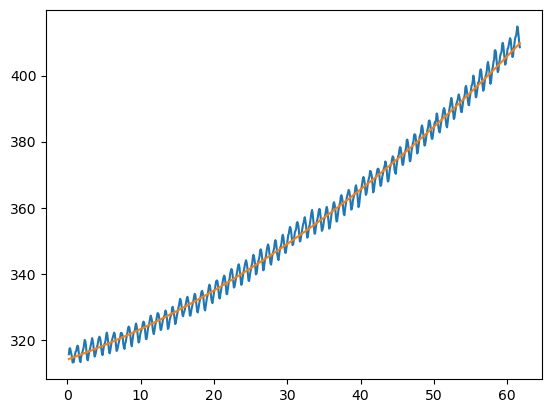

In [34]:
###Fitting a periodic signal
###preparing database to use only training (up to n = 587
dfp = df2.iloc[:587]

#residuals
ypred_train2 = regr2.predict(x_train2)
res = y_train2-ypred_train2 #remove the deterministic trend from the data
plt.plot(t2,y,t2,ypred2)
dfp['res'] = res

In [141]:
periodic = np.zeros(12)
periodic2 = np.zeros(12)
per_raw = np.zeros((12,len(dfp)))


for n in range(12) :
    periodic[n] = dfp[dfp['mn'] == n+1]['res'].values.mean()
    periodic2[n] = np.median(dfp[dfp['mn'] == n+1]['res'].values)

#t2 = dfp.sort_values(by='mn')
#periodic2 = t2['co2'].median()
t2

,yr,mn,datem,date,co2,season,fit,seasonf,co2_2,season_2,res
300,1983,1,30331,1983.0411,341.38,341.34,341.83,341.78,341.38,341.34,-0.405134
336,1986,1,31427,1986.0411,346.30,346.26,346.52,346.47,346.30,346.26,0.178864
84,1965,1,23757,1965.0411,319.44,319.40,319.73,319.68,319.44,319.40,-0.909531
348,1987,1,31792,1987.0411,348.02,347.98,348.02,347.98,348.02,347.98,0.405059
360,1988,1,32157,1988.0410,350.43,350.39,350.44,350.39,350.43,350.39,1.297020
...,...,...,...,...,...,...,...,...,...,...,...
95,1965,12,24091,1965.9562,319.42,320.20,319.90,320.66,319.42,320.20,-1.831402
299,1982,12,30300,1982.9562,340.49,341.32,340.81,341.62,340.49,341.32,-1.177803
35,1960,12,22265,1960.9563,316.19,316.96,316.39,317.15,316.19,316.96,-0.389504
263,1979,12,29204,1979.9562,336.73,337.55,336.88,337.68,336.73,337.55,-0.825973


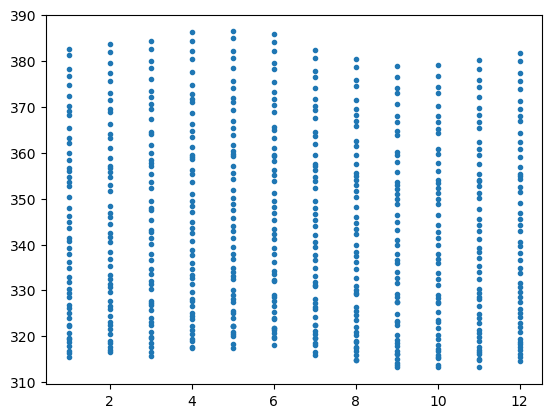

In [135]:
#n=0
#df2[df2['mn'] == n+1]['co2'].values.mean()
df_teste = dfp.sort_values(by='mn')

plt.plot(df_teste['mn'],df_teste['co2'],'.')


([<matplotlib.lines.Line2D at 0x7f6b6eb59c10>],
 <matplotlib.legend.Legend at 0x7f6b6eaf3760>)

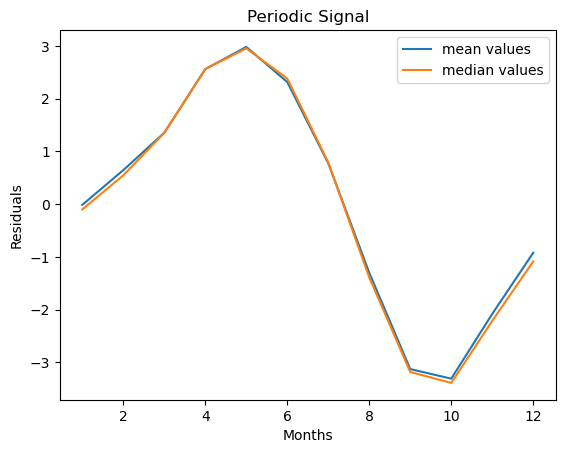

In [144]:
x = np.arange(1,13)
plt.plot(x,periodic,label='mean values'),plt.xlabel('Months'),plt.ylabel('Residuals'),plt.title('Periodic Signal')
plt.plot(x,periodic2,label='median values'),plt.legend()

In [77]:
periodic
#x = np.linspace(1,12,12000)
#plt.plot(periodic)
#yi = sp.interpolate.interp1d(x,periodic)
#plot(x,y,x,yi)


array([-0.01291922,  0.6464066 ,  1.35556911,  2.56185806,  2.98289083,
        2.31647273,  0.77629741, -1.30121251, -3.1280744 , -3.30951984,
       -2.08148674, -0.92150659])

In [51]:
?sp.interpolate.interp1d

Init signature:
sp.interpolate.interp1d(
    x,
    y,
    kind='linear',
    axis=-1,
    copy=True,
    bounds_error=None,
    fill_value=nan,
    assume_sorted=False,
)
Docstring:     
Interpolate a 1-D function.

.. legacy:: class

`x` and `y` are arrays of values used to approximate some function f:
``y = f(x)``. This class returns a function whose call method uses
interpolation to find the value of new points.

Parameters
----------
x : (npoints, ) array_like
    A 1-D array of real values.
y : (..., npoints, ...) array_like
    A N-D array of real values. The length of `y` along the interpolation
    axis must be equal to the length of `x`. Use the ``axis`` parameter
    to select correct axis. Unlike other interpolators, the default
    interpolation axis is the last axis of `y`.
kind : str or int, optional
    Specifies the kind of interpolation as a string or as an integer
    specifying the order of the spline interpolator to use.
    The string has to be one of 'linear', 'n

In [204]:
df2

,yr,mn,datem,date,co2,season,fit,seasonf,co2_2,season_2
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71
6,1958,7,21381,1958.5370,315.86,315.19,315.86,315.21,315.86,315.19
7,1958,8,21412,1958.6219,314.93,316.19,313.99,315.29,314.93,316.19
...,...,...,...,...,...,...,...,...,...,...
736,2019,5,43600,2019.3699,414.83,411.42,414.53,411.12,414.83,411.42
737,2019,6,43631,2019.4548,413.96,411.38,413.89,411.33,413.96,411.38
738,2019,7,43661,2019.5370,411.85,411.03,412.32,411.54,411.85,411.03
739,2019,8,43692,2019.6219,410.08,411.62,410.17,411.75,410.08,411.62


array([[ 0.20833333],
       [ 0.29166667],
       [ 0.375     ],
       [ 0.54166667],
       [ 0.625     ],
       [ 0.70833333],
       [ 0.875     ],
       [ 0.95833333],
       [ 1.04166667],
       [ 1.125     ],
       [ 1.20833333],
       [ 1.29166667],
       [ 1.375     ],
       [ 1.45833333],
       [ 1.54166667],
       [ 1.625     ],
       [ 1.70833333],
       [ 1.79166667],
       [ 1.875     ],
       [ 1.95833333],
       [ 2.04166667],
       [ 2.125     ],
       [ 2.20833333],
       [ 2.29166667],
       [ 2.375     ],
       [ 2.45833333],
       [ 2.54166667],
       [ 2.625     ],
       [ 2.70833333],
       [ 2.79166667],
       [ 2.875     ],
       [ 2.95833333],
       [ 3.04166667],
       [ 3.125     ],
       [ 3.20833333],
       [ 3.29166667],
       [ 3.375     ],
       [ 3.45833333],
       [ 3.54166667],
       [ 3.625     ],
       [ 3.70833333],
       [ 3.79166667],
       [ 3.875     ],
       [ 3.95833333],
       [ 4.04166667],
       [ 4

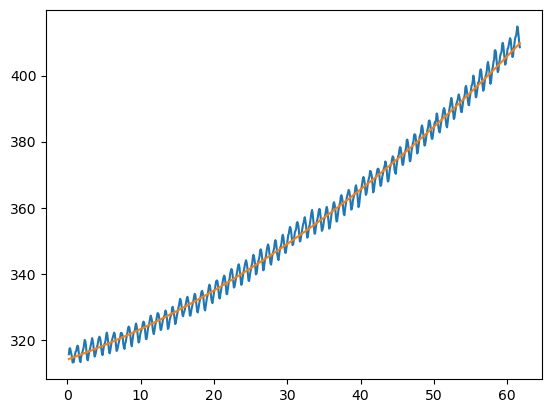

In [177]:
###show the model on top of the entire series
###fitting a quadratic model

x2 = np.column_stack((t2,t2**2))
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y,test_size=0.20,shuffle=False)
regr2 = LinearRegression().fit(x_train2,y_train2)
regr2.score(x_test2,y_test2),regr2.score(x_train2,y_train2)
ypred2 = regr2.predict(x2)
ypred_train = regr2.predict(x_train2)
ypred_test = regr2.predict(x_test2)
plt.plot(t2,y,t2,ypred2)

[]

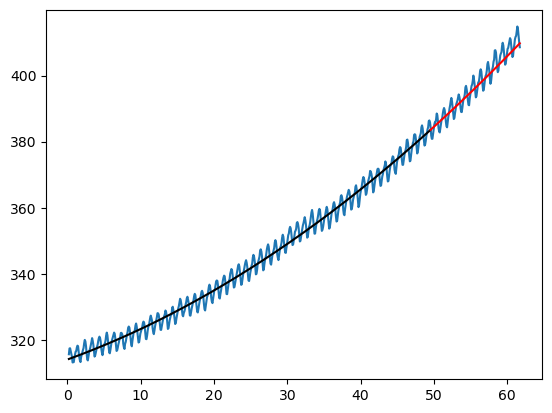

In [213]:
#we will place our model on top of the full data
%matplotlib inline
plt.plot(t2,y)
plt.plot(x_train2[:,0],ypred_train,'k')
plt.plot(x_test2[:,0],ypred_test,'r')
plt.plot()


In [221]:
len(x_test)

147

In [211]:
#Introducing a periodic signal starting from March!
#periodic --> periodic
yf = np.zeros(len(ypred2))
m = 2
for n in range(len(ypred2)) :

    yf[n] = y[n] + periodic[m]

    if (m == 11) : m = -1

    m = m + 1

(<matplotlib.legend.Legend at 0x7f6b522d7130>,
 Text(0.5, 0, 'Fractions of Years'),
 Text(0, 0.5, 'CO² (ppm)'),
 Text(0.5, 1.0, 'Mauna Loa CO² concentrations 1958-2019'))

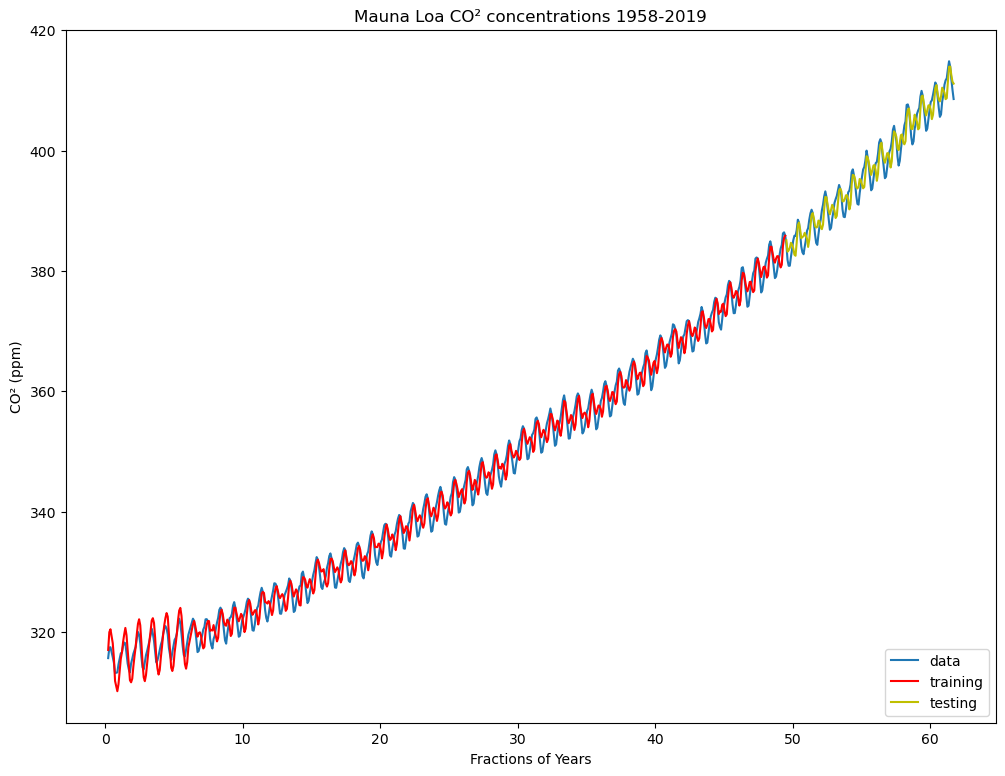

In [241]:
plt.figure(figsize=(12,9))
plt.plot(t2,y,label='data')
plt.plot(x_train2[:,0],yf[:len(x_train2)],'r',label='training')
plt.plot(x_test2[:,0],yf[len(x_train2):],'y',label='testing')
plt.legend(loc=4),plt.xlabel('Fractions of Years'),plt.ylabel('CO² (ppm)'),plt.title('Mauna Loa CO² concentrations 1958-2019')

In [246]:
np.sqrt(mean_squared_error(yf,y)),mean_absolute_percentage_error(yf,y)

(2.0675119008113496, 0.0050678776333349645)

array([[ 1.43178633e+00],
       [ 3.11444002e+00],
       [ 3.10692541e+00],
       [ 1.32139129e+00],
       [ 3.23371776e-01],
       [-1.46481603e+00],
       [-1.48169654e+00],
       [-2.10389244e-01],
       [ 6.30749754e-01],
       [ 1.46172045e+00],
       [ 1.56252285e+00],
       [ 2.56315696e+00],
       [ 3.06362276e+00],
       [ 2.85392027e+00],
       [ 1.17404947e+00],
       [-6.35989619e-01],
       [-1.66619701e+00],
       [-2.24657270e+00],
       [-8.37116687e-01],
       [-1.37828973e-01],
       [ 6.41290442e-01],
       [ 1.12024156e+00],
       [ 1.64902438e+00],
       [ 3.02763890e+00],
       [ 3.96608512e+00],
       [ 3.44436304e+00],
       [ 1.96247266e+00],
       [-3.89586014e-01],
       [-2.19181299e+00],
       [-2.60420826e+00],
       [-1.50677183e+00],
       [-3.89503701e-01],
       [ 2.37596131e-01],
       [ 9.74527664e-01],
       [ 1.74129090e+00],
       [ 2.60788583e+00],
       [ 3.63431247e+00],
       [ 2.75057081e+00],
       [ 1.4

In [249]:
min(y),max(y)

(array([313.21]), array([414.83]))

In [250]:
min(periodic),max(periodic)

(-3.3095198418856406, 2.982890825273962)

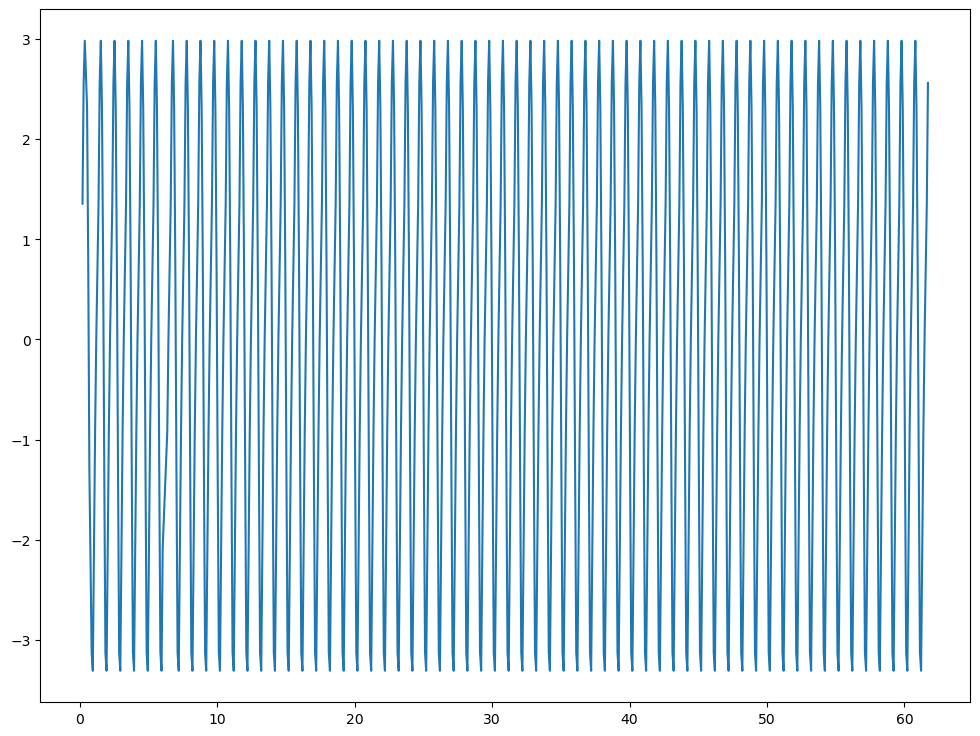

In [283]:
plt.figure(figsize=(12,9))

plt.plot(t2,yf-y,)

In [269]:
y.T

array([[315.7 , 317.45, 317.51, 315.86, 314.93, 313.21, 313.33, 314.67,
        315.58, 316.48, 316.65, 317.72, 318.29, 318.15, 316.54, 314.8 ,
        313.84, 313.33, 314.81, 315.58, 316.43, 316.98, 317.58, 319.03,
        320.04, 319.59, 318.18, 315.9 , 314.17, 313.83, 315.  , 316.19,
        316.89, 317.7 , 318.54, 319.48, 320.58, 319.77, 318.57, 316.79,
        314.99, 315.31, 316.1 , 317.01, 317.94, 318.55, 319.68, 320.57,
        321.02, 320.62, 319.61, 317.4 , 316.25, 315.42, 316.69, 317.7 ,
        318.74, 319.07, 319.86, 321.38, 322.25, 321.48, 319.74, 317.77,
        316.21, 315.99, 317.07, 318.35, 319.57, 322.25, 321.89, 320.44,
        318.69, 316.7 , 316.87, 317.68, 318.71, 319.44, 320.44, 320.89,
        322.14, 322.17, 321.87, 321.21, 318.87, 317.82, 317.3 , 318.87,
        319.42, 320.62, 321.6 , 322.39, 323.7 , 324.08, 323.75, 322.38,
        320.36, 318.64, 318.1 , 319.78, 321.03, 322.33, 322.5 , 323.04,
        324.42, 325.  , 324.09, 322.54, 320.92, 319.25, 319.39, 

In [270]:
y

array([[315.7 ],
       [317.45],
       [317.51],
       [315.86],
       [314.93],
       [313.21],
       [313.33],
       [314.67],
       [315.58],
       [316.48],
       [316.65],
       [317.72],
       [318.29],
       [318.15],
       [316.54],
       [314.8 ],
       [313.84],
       [313.33],
       [314.81],
       [315.58],
       [316.43],
       [316.98],
       [317.58],
       [319.03],
       [320.04],
       [319.59],
       [318.18],
       [315.9 ],
       [314.17],
       [313.83],
       [315.  ],
       [316.19],
       [316.89],
       [317.7 ],
       [318.54],
       [319.48],
       [320.58],
       [319.77],
       [318.57],
       [316.79],
       [314.99],
       [315.31],
       [316.1 ],
       [317.01],
       [317.94],
       [318.55],
       [319.68],
       [320.57],
       [321.02],
       [320.62],
       [319.61],
       [317.4 ],
       [316.25],
       [315.42],
       [316.69],
       [317.7 ],
       [318.74],
       [319.07],
       [319.86

In [275]:
y = y.T[0]

In [276]:
yf-y

array([ 1.35556911,  2.56185806,  2.98289083,  2.31647273,  0.77629741,
       -1.30121251, -3.1280744 , -3.30951984, -2.08148674, -0.92150659,
       -0.01291922,  0.6464066 ,  1.35556911,  2.56185806,  2.98289083,
        2.31647273,  0.77629741, -1.30121251, -3.1280744 , -3.30951984,
       -2.08148674, -0.92150659, -0.01291922,  0.6464066 ,  1.35556911,
        2.56185806,  2.98289083,  2.31647273,  0.77629741, -1.30121251,
       -3.1280744 , -3.30951984, -2.08148674, -0.92150659, -0.01291922,
        0.6464066 ,  1.35556911,  2.56185806,  2.98289083,  2.31647273,
        0.77629741, -1.30121251, -3.1280744 , -3.30951984, -2.08148674,
       -0.92150659, -0.01291922,  0.6464066 ,  1.35556911,  2.56185806,
        2.98289083,  2.31647273,  0.77629741, -1.30121251, -3.1280744 ,
       -3.30951984, -2.08148674, -0.92150659, -0.01291922,  0.6464066 ,
        1.35556911,  2.56185806,  2.98289083,  2.31647273,  0.77629741,
       -1.30121251, -3.1280744 , -3.30951984, -2.08148674, -0.92